In [ ]:
PATH = r''
file_name = 'suspicious_tweets_off.csv'
import os
os.chdir(PATH)

In [ ]:
%run setup.ipynb

In [3]:
df = pd.read_csv(f'{PATH}/{file_name}')
df

,message,label
0,awww bummer shoulda get david carr third day,1
1,upset update facebook texting might cry result...,1
2,dive many time ball manage save rest bound,1
3,whole body feel itchy like fire,0
4,hey long time see yes rain bit bit lol fine thank,1
...,...,...
45589,awakee dress ready gooo haha lol,1
45590,gorgeous weather seem manchester,1
45591,well day almost think go watch dvds probably a...,1
45592,really want see zac efron amazingly fit,1


In [4]:
print("Basic information about the dataset:")
print(df.info())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45594 entries, 0 to 45593
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  45594 non-null  object
 1   label    45594 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 712.5+ KB
None


### Label Distribution

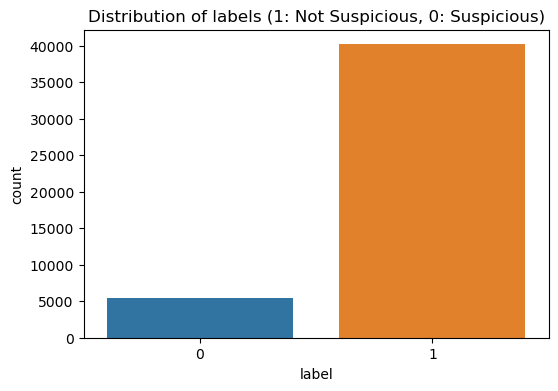

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of labels (1: Not Suspicious, 0: Suspicious)')
plt.show()

### Word Clouds

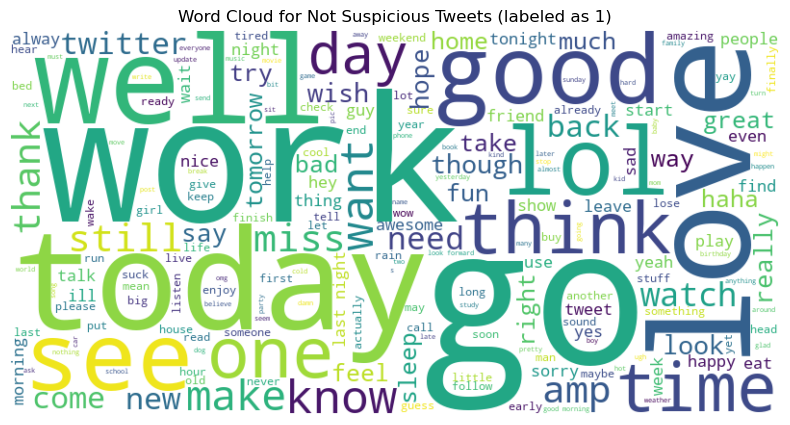

In [6]:
text_1 = ' '.join(df[df['label'] == 1]['message'])
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(text_1)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.title('Word Cloud for Not Suspicious Tweets (labeled as 1)')
plt.axis('off')
plt.show()

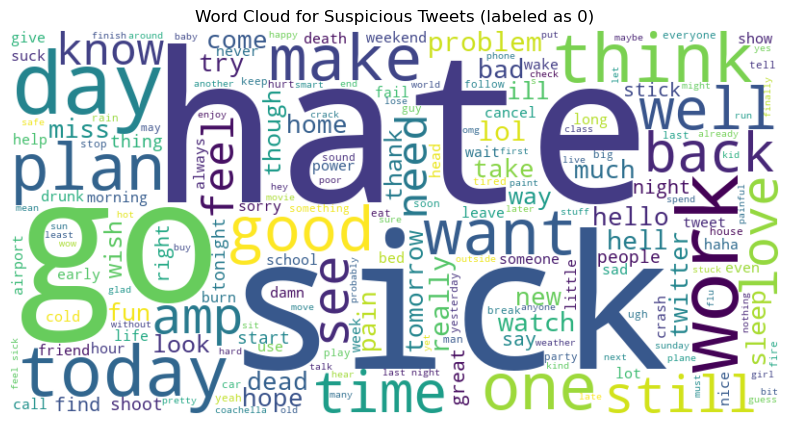

In [7]:
text_0 = ' '.join(df[df['label'] == 0]['message'])
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(text_0)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.title('Word Cloud for Suspicious Tweets (labeled as 0)')
plt.axis('off')
plt.show()

### Most Common Words and N-grams by Count

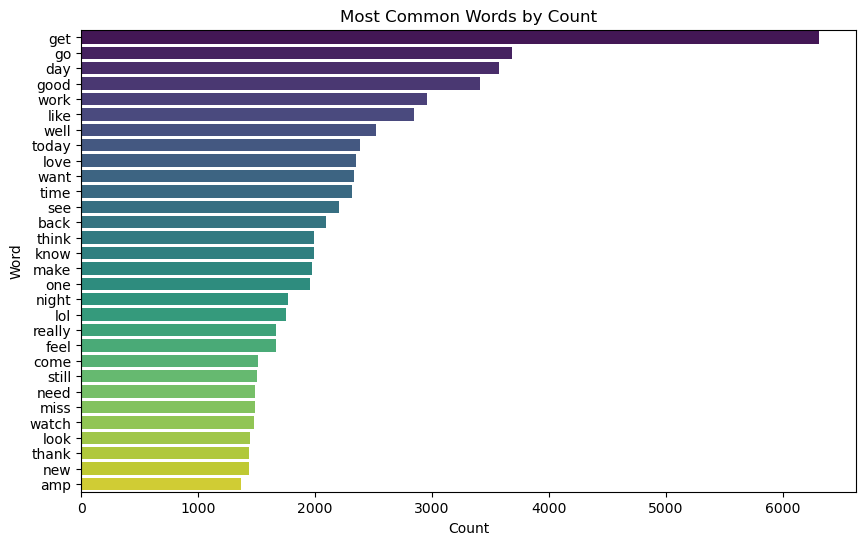

In [8]:

word_counts = Counter(' '.join(df['message']).split())
common_words = word_counts.most_common(30)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')
plt.title('Most Common Words by Count')
plt.show()

In [9]:
def generate_ngrams(text, n):
    tokens = word_tokenize(text)
    n_grams = list(zip(*[tokens[i:] for i in range(n)]))
    return n_grams

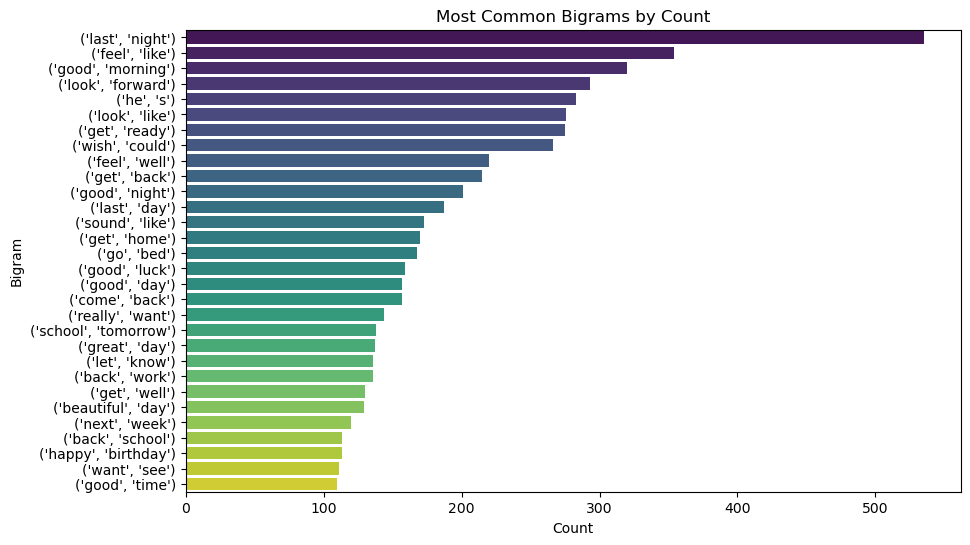

In [10]:
df['bigrams'] = df['message'].apply(lambda x: generate_ngrams(x, 2))

all_bigrams = [x for bigram in df['bigrams'] for x in bigram]
bigram_freq = Counter(all_bigrams)

common_bigrams = bigram_freq.most_common(30)
common_bigrams_df = pd.DataFrame(common_bigrams, columns=['Bigram', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Bigram', data=common_bigrams_df, palette='viridis')
plt.title('Most Common Bigrams by Count')
plt.show()

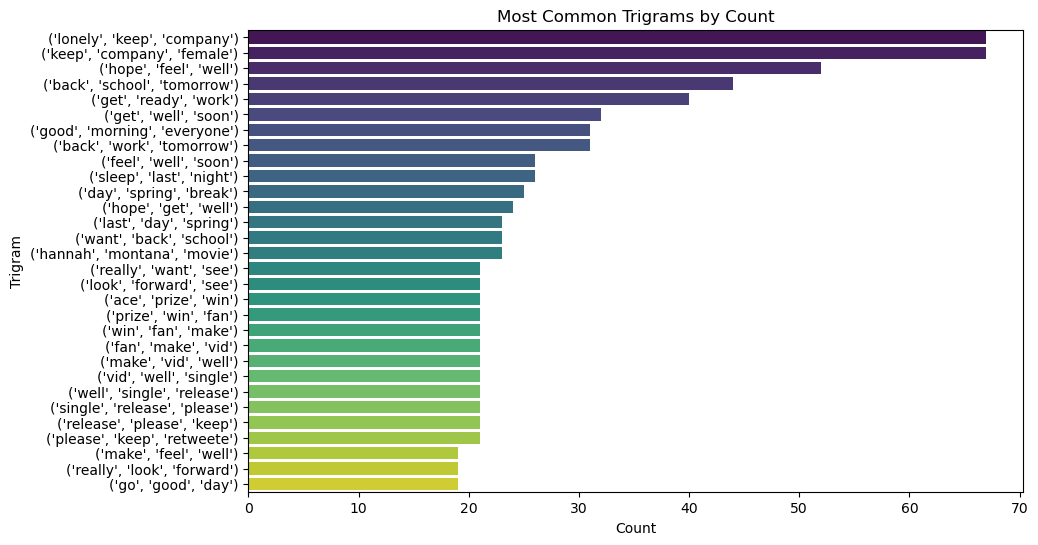

In [11]:
df['trigrams'] = df['message'].apply(lambda x: generate_ngrams(x, 3))

all_trigrams = [x for trigram in df['trigrams'] for x in trigram]
trigram_freq = Counter(all_trigrams)

common_trigrams = trigram_freq.most_common(30)
common_trigrams_df = pd.DataFrame(common_trigrams, columns=['Trigram', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Trigram', data=common_trigrams_df, palette='viridis')
plt.title('Most Common Trigrams by Count')
plt.show()

### Joint Plot for Tweet Length and Word Length

/Users/leonardomontrucchio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/leonardomontrucchio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/leonardomontrucchio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/leonardomontrucchio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

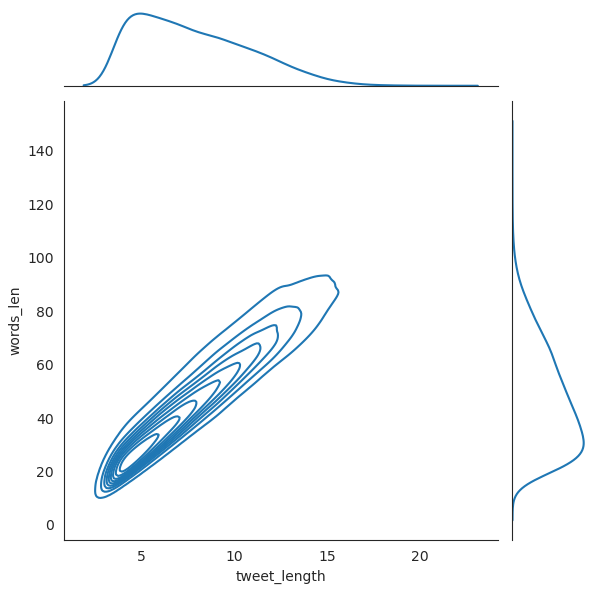

In [12]:
df["tweet_length"] = df["message"].apply(lambda x: len(x.split()))
df["words_len"] = df["message"].apply(len)

with sns.axes_style('white'):
    sns.jointplot(x="tweet_length", y="words_len", data=df, kind='kde', marginal_kws={"bw_adjust": 2}, joint_kws={"bw_adjust": 1.2})

plt.show()